In [2]:
conda install -U numpy


Note: you may need to restart the kernel to use updated packages.


'C:\Program' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
from __future__ import print_function, division
!pip install torch
!pip install torchvision
import os
import torch
from torch import nn, optim
from torch.optim import lr_scheduler
import torchvision
import pandas as pd
from skimage import io, transform
from torchvision.io import read_image
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils, models
from PIL import Image
from mpl_toolkits.axes_grid1 import ImageGrid

!pip install IPython
from IPython.core.debugger import set_trace
!pip install scikit-learn
from sklearn.preprocessing import OneHotEncoder

import time
import os
import copy

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [5]:
import torch

In [8]:
from torch.utils.data import Dataset, DataLoader

In [8]:
from torchvision import transforms, utils, models

In [18]:
import pandas as pd

In [1]:
from skimage import io, transform

In [15]:
from torchvision import transforms, utils, models

In [46]:
import os


In [47]:
import matplotlib.pyplot as plt

In [45]:
from torch import nn, optim

In [34]:
from mpl_toolkits.axes_grid1 import ImageGrid

In [50]:
# Check for GPU
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

cpu


In [ ]:
"""
# run only when training in colab
from google.colab import drive
drive.mount('/content/gdrive')


path ='/content/gdrive/MyDrive/"Colab Notebooks"/data'""


In [67]:
#custom Dataset class to load the custom data
class CustomDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        #if torch.is_tensor(index):
            #idx = idx.tolist()
            
        
        
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image = io.imread(img_path)
        
        #convert str labels to int labels
        class_map = {'Latino_Hispanic': 0,
             'East Asian': 1,
             'Indian': 2,
             'Middle Eastern': 3,
             'Black': 4,
             'Southeast Asian': 5,
             'White': 6
             }
        
        label = self.annotations.iloc[index, 3] # returns a tuple of strings
        label =class_map[label]
        #label= OneHotEncoder(label)
        
        #label = label.applylambda label: list(map(int, label)))
        
        if self.transform:
            image = self.transform(image)
        
        return image, label


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn.model_selection import train_test_split

In [19]:
from torchvision import transforms as T
vis_augs = transforms.Compose([
                    T.ToPILImage(),
                    T.Resize((224,224)),
                    T.ToTensor(),
                     
    ]
                    )

In [20]:
# Load Data
train_data = CustomDataset(
    csv_file="fairface_label_train.csv",
    root_dir="train/",
    transform=vis_augs,
)

# Load Data
test_data = CustomDataset(
    csv_file="fairface_label_val.csv",
    root_dir="/val",
    transform=vis_augs,
)

In [71]:
test_data = CustomDataset(
    csv_file="fairface_label_val.csv",
    root_dir="val/",
    transform=vis_augs,
)

In [ ]:
#train_subset, test_subset,_ =train_test_split([30000 ,10000,46744 ], stratify=train_data[1])

In [ ]:
#split the data to train quickly
#train_data_1, labels_1, train_data_2, labels_2 = train_test_split(train_data[0],train_data[1], test_size = 0.6, shuffle =False)
len(train_data)
print(f'length of train data: {len(train_data)}, end =" "')
print(f'length of test data: {len(test_data)}, end =" "')

In [21]:
#split the data to train quickly. use a subset of the training data
train_subset, val_subset, remaining_data = torch.utils.data.random_split(train_data, [30000 ,1000,55744 ])

In [22]:
train_data = remaining_data

In [15]:
len(train_data)

55744

In [ ]:
_,testdata,_ = torch.utils.data.random_split(remaining_data, [20000 ,1000,34744 ])

In [25]:
targets = []
ctr =0
for _, target in train_data:
    targets.append(target)
    ctr +=1
    #print(ctr, end = " ")
#targets = torch.stack(targets) #concatenates tensors
#targets = torch.tensor(targets)"""

In [26]:
targets_df = pd.DataFrame(targets,columns = ['target class'])

In [27]:
targets_df.to_csv('targets_df_50k.csv',index = True)

In [ ]:
targets[5:10]

In [28]:
#check the distribution of the train data

from collections import Counter
target_counts = Counter(targets)


In [29]:
target_counts

Counter({3: 5992, 2: 7966, 5: 6949, 0: 8598, 6: 10617, 4: 7797, 1: 7825})

In [ ]:
""" 
only use with weighted random sampler in dataloader
targets = []
ctr =0
for _, target in train_data:
    targets.append(target)
    ctr +=1
    print(ctr, end = " ")
#targets = torch.stack(targets) #concatenates tensors
targets = torch.tensor(targets)"""

In [ ]:
#one hot encoding alternative to sklearn encoder

""" target_transform=Lambda(lambda labels: torch.zeros(10, dtype=torch.float)
                                    .scatter_(dim=0, index=torch.tensor(labels), value=1))"""

In [ ]:
img,lbl = train_data[7][0],train_data[7][1]

In [ ]:
img.shape

In [ ]:
lbl

In [ ]:
type(lbl)

In [36]:
vis_iter = DataLoader(train_data, batch_size=64, shuffle=True)

In [ ]:
len(vis_iter)

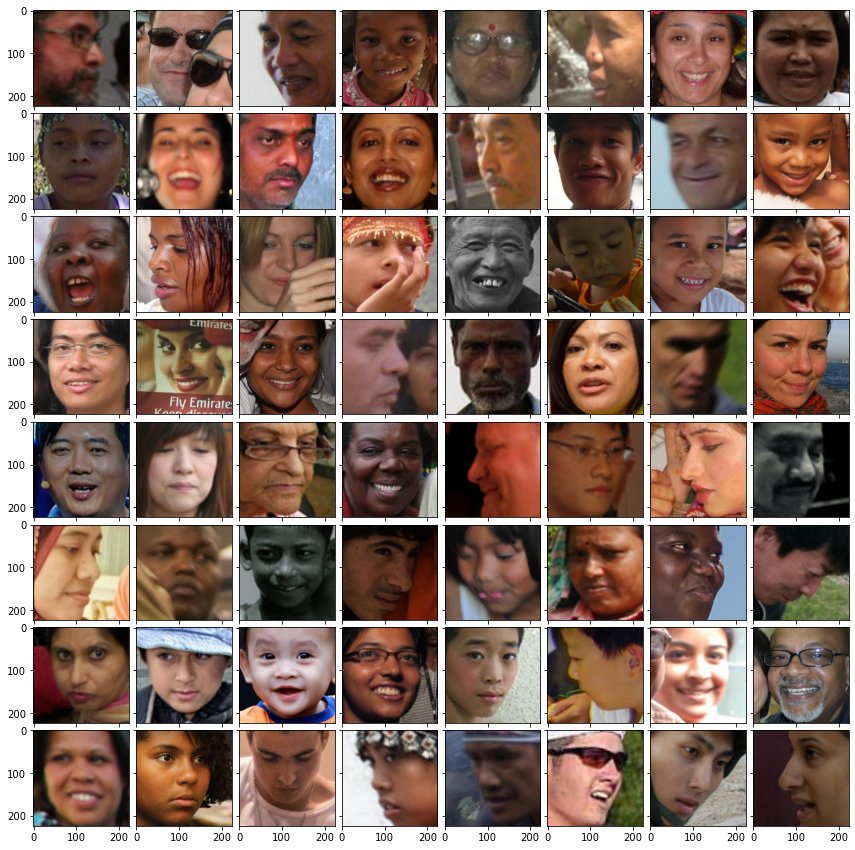

In [37]:
fig = plt.figure(figsize=(15., 15.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(8, 8),  # creates 3x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                )

for (imgs, labels) in vis_iter:
    #set_trace()
    for ax, img in zip(grid, imgs):
        img = img.permute(1,2,0)
        plt.title(labels)
        ax.imshow(img.squeeze().numpy())
    break

In [38]:
batch_size = 16

In [39]:
print(batch_size)

16


In [40]:

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)


In [72]:
test_loader = DataLoader(test_data,batch_size=batch_size, shuffle=True)

In [62]:
len(test_data)

10954

In [43]:
model = models.vgg16(pretrained=True)
#model = models.AlexNet(pretrained = True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\pc16abc/.cache\torch\hub\checkpoints\vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [ ]:
#model

In [48]:
#replace the last linear layer from classifier
last_layer = nn.Linear(4096,7)
model.classifier[6] = last_layer
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [51]:
model = model.to(device)


In [52]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_loader))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model.eval()
with torch.inference_mode():
    pred = model(img_single.to(device))
    
# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:{pred}\n")
print(f"Output prediction probabilities: {torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label: {label_single}")

Single image shape: torch.Size([1, 3, 224, 224])

Output logits:tensor([[-0.2353,  0.2016,  0.4656,  0.3570, -0.2672, -0.2360, -0.3191]])

Output prediction probabilities: tensor([[0.1080, 0.1672, 0.2177, 0.1953, 0.1046, 0.1079, 0.0993]])

Output prediction label:tensor([2])

Actual label: 5


In [53]:
# Install torchinfo if it's not available, import it if it is
try: 
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo
    
from torchinfo import summary
summary(model, input_size=[1, 3, 224, 224]) # do a test pass through of an example input size 

Defaulting to user installation because normal site-packages is not writeable


Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      --                        --
├─Sequential: 1-1                        [1, 512, 7, 7]            --
│    └─Conv2d: 2-1                       [1, 64, 224, 224]         1,792
│    └─ReLU: 2-2                         [1, 64, 224, 224]         --
│    └─Conv2d: 2-3                       [1, 64, 224, 224]         36,928
│    └─ReLU: 2-4                         [1, 64, 224, 224]         --
│    └─MaxPool2d: 2-5                    [1, 64, 112, 112]         --
│    └─Conv2d: 2-6                       [1, 128, 112, 112]        73,856
│    └─ReLU: 2-7                         [1, 128, 112, 112]        --
│    └─Conv2d: 2-8                       [1, 128, 112, 112]        147,584
│    └─ReLU: 2-9                         [1, 128, 112, 112]        --
│    └─MaxPool2d: 2-10                   [1, 128, 56, 56]          --
│    └─Conv2d: 2-11                      [1, 256, 56, 56]          29

In [54]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

### Training Loss and Optmizer

In [55]:
class_map = {'Latino_Hispanic': 0,
             'East Asian': 1,
             'Indian': 2,
             'Middle Eastern': 3,
             'Black': 4,
             'Southeast Asian': 5,
             'White': 6
             }

In [ ]:
#@title Default title text
"""for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in (train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')"""

In [ ]:
#@title Default title text
"""def train_model(model, criterion, optimizer, scheduler, num_epochs):
   # Put model in train mode
    model.train()
    running_loss = 0.0
    running_corrects = 0.0

     # Iterate over data.
    for inputs, labels in (train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward      
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # backward + optimize only if in training phase
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels)
    scheduler.step()
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = running_corrects.double() / len(train_loader)

    print(f'train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
    return epoch_loss, epoch_acc"""


In [57]:
model = model.to(device)

criterion = nn.CrossEntropyLoss()

 #Observe that all parameters are being optimized
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
#scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [58]:
len(train_loader)

3484

In [60]:
  # Put model in train mode

model.train()

counter = 0
for epoch in range(25): 
    running_loss = 0.0
    running_corrects =0.0
    #set_trace()
    # Iterate over data.
    for inputs, labels in train_loader:
        #set_trace()
        counter +=1
       # print(f'iteration: {counter}',end=" ")
        #inputs, labels =data
        
        inputs = inputs.to(device)
        labels = labels.to(device)
        #set_trace()
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward      
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        
      # preds = torch.argmax(torch.softmax(pred, dim=1), dim=1)
        loss = criterion(outputs, labels)

        # backward + optimize only if in training phase
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        #print(f'running losss: {running_loss}', end= " ")
        
        running_corrects += torch.sum(preds == labels)
        #print(f'running corrects: {running_corrects}')       
            
        #running_corrects =0.0
        #running_loss = 0.0
        
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = running_corrects.double() / len(train_loader)

    print(f'{epoch} train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
    #return epoch_loss, epoch_acc

0 train Loss: 1.3089 Acc: 7.8838
1 train Loss: 1.0544 Acc: 9.4679
2 train Loss: 0.9232 Acc: 10.3037
3 train Loss: 0.8158 Acc: 11.0155
4 train Loss: 0.7211 Acc: 11.5864
5 train Loss: 0.6221 Acc: 12.2021
6 train Loss: 0.5288 Acc: 12.7672
7 train Loss: 0.4437 Acc: 13.3183
8 train Loss: 0.3659 Acc: 13.7945
9 train Loss: 0.3062 Acc: 14.2058
10 train Loss: 0.2585 Acc: 14.4923
11 train Loss: 0.2161 Acc: 14.7365


KeyboardInterrupt: 

###### 

In [61]:
PATH = './vgg16_11_epochs.pth'
torch.save(model.state_dict(), PATH)

In [64]:
len(train_loader)

3484

In [73]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 61 %


In [74]:
class_map = {0:'Latino_Hispanic',
             1:'East Asian',
             2:'Indian',
             3:'Middle Eastern',
             4:'Black',
             5:'Southeast Asian',
             6:'White'
             }

In [79]:
classes =list(class_map.values())

In [80]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5f} is {accuracy:.1f} %')

ValueError: Unknown format code 'f' for object of type 'str'

In [82]:
# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname} is {accuracy:.1f} %')

Accuracy for class: Latino_Hispanic is 45.8 %
Accuracy for class: East Asian is 67.7 %
Accuracy for class: Indian is 60.4 %
Accuracy for class: Middle Eastern is 51.8 %
Accuracy for class: Black is 78.3 %
Accuracy for class: Southeast Asian is 43.3 %
Accuracy for class: White is 75.1 %


In [ ]:
running_loss

In [ ]:
len(train_loader)

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    running_acc = 0.0
    i=0

    for images, labels in train_loader:
        i+=1
        # get the inputs
        images = images.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()
        # predict classes using images from the training set
        outputs = model(images)
        # compute the loss based on model output and real labels
        loss = criterion(outputs, labels)
        # backpropagate the loss
        loss.backward()
        # adjust parameters based on the calculated gradients
        optimizer.step()

        # Let's print statistics for every 1,000 images
        running_loss += loss.item()     # extract the loss value
        print(f'Running loss: {running_loss}')
        if i % 100 == 99:    
            # print every 1000 (twice per epoch) 
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            # zero the loss
            running_loss = 0.0

In [ ]:
running_loss/100

In [ ]:
trained_model =train_model(model = model, criterion = criterion , optimizer =optimizer_ft, scheduler = exp_lr_scheduler, num_epochs=2)

In [ ]:
#@title Default title text
"""def train_model(model, criterion, optimizer, scheduler, num_epochs=2):
    
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in (train_loader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / len(train_loader)
            epoch_acc = running_corrects.double() / len(train_loader)

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model"""

In [ ]:
#@title Default title text
""" def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)"""

In [ ]:
torch.cuda.is_available()

In [ ]:
model = model.to(device)

criterion = nn.CrossEntropyLoss()

 #Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
model_ft = train_model(model, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=2)

In [ ]:
###custom loop

**Custom Loop**

In [ ]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
"""for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for  data in enumerate(train_loader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        print(running_loss)
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')"""

In [ ]:
running_loss

In [ ]:
def train_step( model, 
               train_loader, 
               loss_fn, 
               optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (inputs, labels) in enumerate(train_loader):
        # Send data to target device
        #X, y = X.to(device), y.to(device)
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 1. Forward pass
        y_pred = model(inputs)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, labels)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == labels).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(train_loader)
    train_acc = train_acc / len(train_loader)
    return train_loss, train_acc

In [ ]:
def test_step(model, 
              dataloader, 
              loss_fn):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (inputs, labels) in enumerate(test_loader):
            # Send data to target device
            inputs, labels = inputs.to(device), labels.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(inputs)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, labels)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == labels).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(test_loader)
    test_acc = test_acc / len(test_loader)
    return test_loss, test_acc